## DDA Full Stack Interview
Part 1\
Samir Farhoumand

### Case Study 1

In [1]:
#import pandas
import pandas as pd
#import requests to get around 406 denial
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#url for csv
csv_url = "https://www.openintro.org/data/csv/loans_full_schema.csv"

#import data 
urlData = requests.get(csv_url, headers={"User-Agent": "XY"}).content
df = pd.read_csv(io.StringIO(urlData.decode('utf-8')))

df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


Dataframe contains 10,000 obversations of 55 features, some qualitative and some quantitative.

### Describe the dataset and any issues with it:

In [2]:
#let's investigate our dataframe
def investigate(data):
    print(data.info())
    print(data.describe())
    
investigate(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

Of the 55 features, 42 are quantitative. The rest are qualitative. We do have some columns with missing values so we should investigate the number of missing values.

In [3]:
#check percentage of missing values
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

null_values(df)

,Missing Values,% of Total Values
verification_income_joint,8545,85.4
annual_income_joint,8505,85.0
debt_to_income_joint,8505,85.0
months_since_90d_late,7715,77.2
months_since_last_delinq,5658,56.6
months_since_last_credit_inquiry,1271,12.7
emp_title,833,8.3
emp_length,817,8.2
num_accounts_120d_past_due,318,3.2
debt_to_income,24,0.2


Of the 55 columns, only 10 have missing data. Of these, only a few seem to be do to record keeping mistakes. The majority are due to clients not filing jointly or fitting special circumstances such as being delinquent. Before running any models we will need to address these columns. In the mean time, let's check the distribution of data types.

Text(0, 0.5, 'Data type')

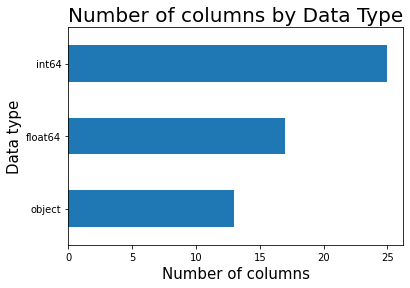

In [4]:
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns by Data Type',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

We have quite a few columns that are of an object datatype that will also pose a problem while modeling, unless we convert them using label encoding.

In [5]:
#check to how many categories for each categorical column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

emp_title                    4741
state                          50
homeownership                   3
verified_income                 3
verification_income_joint       3
loan_purpose                   12
application_type                2
grade                           7
sub_grade                      32
issue_month                     3
loan_status                     6
initial_listing_status          2
disbursement_method             2
dtype: int64

If we were to model with any of these columns, we should label encode the columns having only 2 categorical data and one-hot encode columns with more than 2. We may drop emp_title as there may not be enough unique values to use for modeling.

### Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing

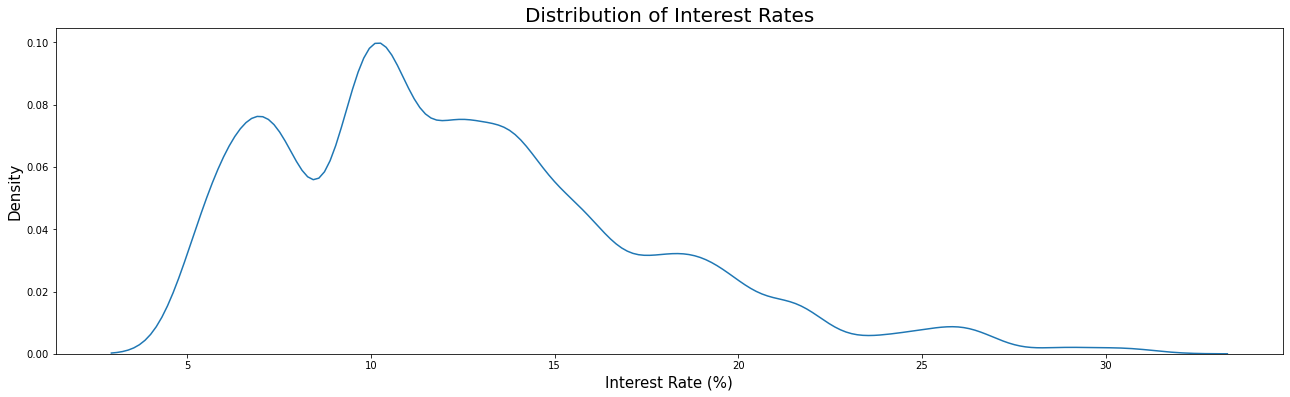

In [6]:
#plot interest rate distribution
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df["interest_rate"], label = 'target = 1')
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rates',fontsize=20);
plt.show()

Interest rates seem to be multimodal. The PDF curve suggests that there are several different interest rates curves that are overlapping one another. This may be due to interest rates are defined discretely rather than continously. 

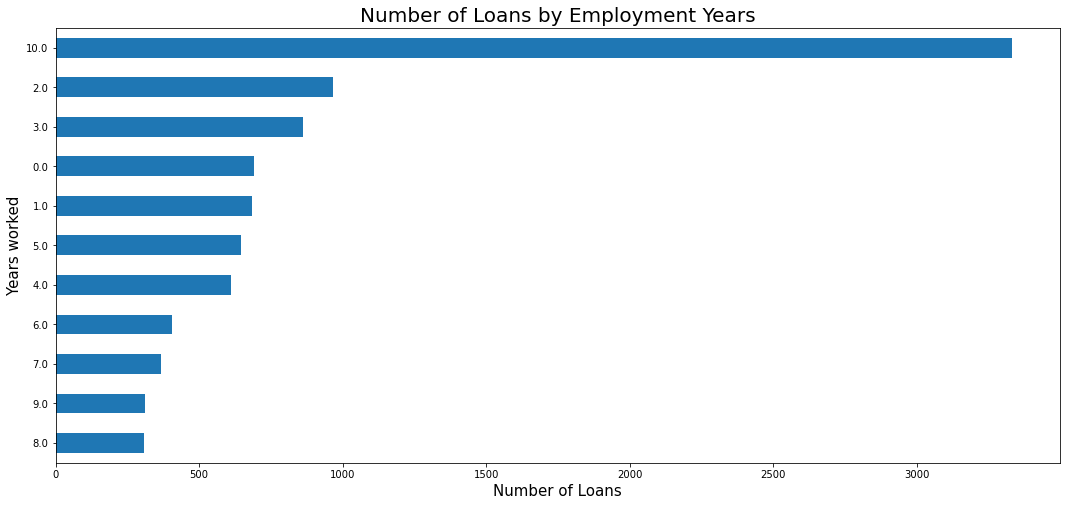

In [7]:
#check number of loans by years employed
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of Loans by Employment Years',fontsize=20)
plt.xlabel('Number of Loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15)
plt.show()

Ten years is the max; meaning employees who have worked longer than 10 years have been consolidated into this category. Without this is mind, one may be tempted to postulate that only those with many years of employment are more likely to get loans. I, however, feel that a correct interpretation would be those who have stable employment of at least 1 year or more are more likely to get a loan, and then this tapers as the years go on.

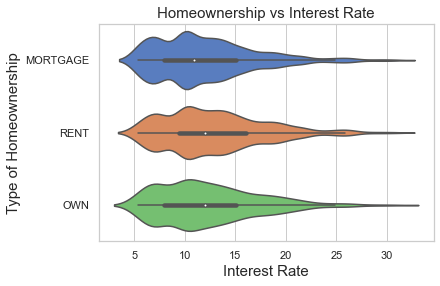

In [8]:
#violin plots of interest rate by homeownership
sns.set_theme(style = "whitegrid")
ax = sns.violinplot(x = df["interest_rate"], y = df["homeownership"],
                    palette = "muted")
plt.xlabel('Interest Rate',fontsize=15)
plt.ylabel('Type of Homeownership',fontsize=15)
plt.title('Homeownership vs Interest Rate',fontsize=15)
plt.show()

The difference between the three types of home ownership is slight, however it seems renters usually have a higher interest rate than either those with mortgages or who own. I would venture to say homeownership has a very small has a slight impact on the interest rate.

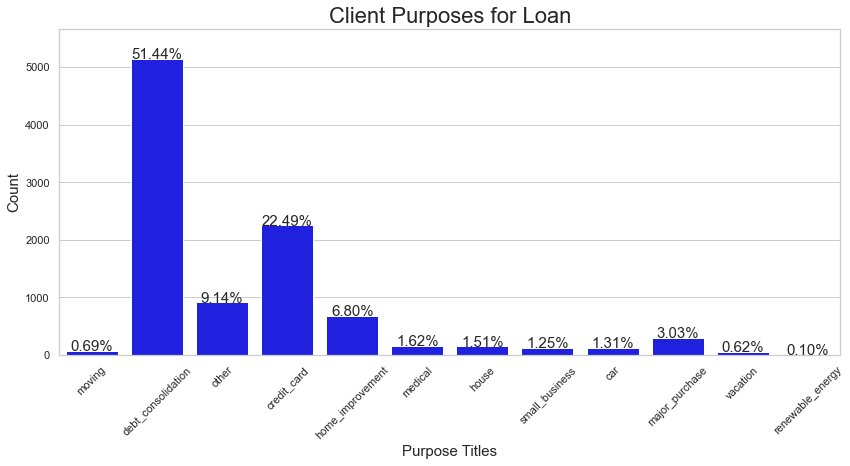

In [9]:
#find major purposes for the loans
plt.figure(figsize=(14,6))

g = sns.countplot(x='loan_purpose', data=df, color='blue')
g.set_title("Client Purposes for Loan", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=15)
g.set_ylabel('Count', fontsize=15)

sizes=[]

total = len(df)

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.show()

By far the largest purpose for a loan is for debt consolidation followed distantly by credit card debt. It seems people may turn to this type of debt when other, more traditional, avenues are not available due to their existing debt. 

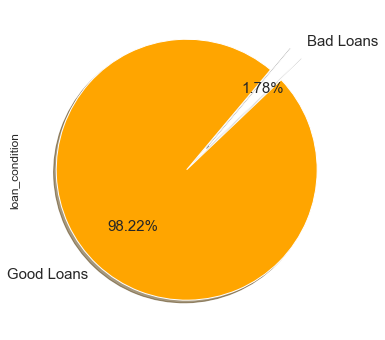

In [10]:
#determining percentage of bad loans
bad = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", 
       "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]

df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad:
        return 'Bad Loan'
    else:
        return 'Good Loan'
   
df['loan_condition'] = df['loan_status'].apply(loan_condition)

colors = ["orange", "white"]
labels ="Good Loans", "Bad Loans"

plt.figure(figsize=(14,6))

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], 
                                             autopct='%1.2f%%',
                                             shadow=True, 
                                             colors=colors, 
                                             labels=labels, 
                                             fontsize=15, 
                                             startangle=50)
plt.show()

The vast majority of the loans are in good standing, with a small minority fitting into the one of the "bad" categories.

### Create a feature set and create a model which predicts interest rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data.

First let's drop all the columns missing more than 50% of data

In [11]:
def drop_nan_columns(data, ratio=1.0):
    """
    The ratio parameter (0.0<=ratio<1.0) lets you drop columns which has 'ratio'% of nans. 
    (i.e if ratio is 0.8 then all columns with 80% or more entries being nan get dropped)
    Returns a new dataframe
    """
    col_list = []
    na_df = data.isna()
    total_size = na_df.shape[0]
    for col in na_df:
        a = na_df[col].value_counts()
        if False not in a.keys():
            col_list.append(col)
        elif True not in a.keys():
            pass
        else:
            if a[True]/total_size >= ratio:
                col_list.append(col)
    print(f"{len(col_list)} columns dropped- {col_list}")
    return data.drop(col_list, axis=1)

df = drop_nan_columns(df, ratio=0.50)

5 columns dropped- ['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'months_since_last_delinq', 'months_since_90d_late']


Let's recheck missing values remaining:

In [12]:
#check percentage of missing values remaining
null_values(df)

,Missing Values,% of Total Values
months_since_last_credit_inquiry,1271,12.7
emp_title,833,8.3
emp_length,817,8.2
num_accounts_120d_past_due,318,3.2
debt_to_income,24,0.2


Perhaps emp_title is empty for those who are unemployed, so let's check to see if that category even exists.

In [13]:
unemployed = ['unemployed', 'none', 'Unemployed', 'other', 'Other', "not working", "no"]
for item in unemployed:
    if item in df['emp_title']:
        print("Found It at ", item)

I am going to assume the missing data in emp_title stand for unemployed. Let's replace it with "unemployed." For emp_length, debt_to_income, and months_since_last_credit_inquiry, and num_accounts_120d_past_due we will use mean filling.

In [14]:
def handle_nans(data):
    """
    Handle the nans induvidually per column
    emp_title: make Nan -> Unemployed
    """
    data['emp_title'] = data['emp_title'].fillna("Unemployed")
    mean_cols = ['emp_length', 'debt_to_income', 'months_since_last_credit_inquiry',
                "num_accounts_120d_past_due"]
    for col in mean_cols:
        data[col] = data[col].fillna(data[col].mean())
    return

handle_nans(df)

In [15]:
null_values(df)

,Missing Values,% of Total Values


We can confirm we've handled all the missing data. Now let's begin addressing the categorical data.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         10000 non-null  object 
 1   emp_length                        10000 non-null  float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    10000 non-null  float64
 7   delinq_2y                         10000 non-null  int64  
 8   earliest_credit_line              10000 non-null  int64  
 9   inquiries_last_12m                10000 non-null  int64  
 10  total_credit_lines                10000 non-null  int64  
 11  open_credit_lines                 10000 non-null  int64  
 12  total

We must change the following into categorical variables: emp_title, state, homeownership, verified_income, loan_purpose, application_type, grade, sub_grade, issue_month, loan_status, initial_listing_status, and disbursement_method. 

In [17]:
categoricals = ["emp_title", "state", "homeownership", "verified_income", "loan_purpose", 
                "application_type", "grade", "sub_grade", "issue_month", "loan_status", 
                "initial_listing_status", "disbursement_method", "loan_condition"]

def handle_types(data, categoricals):
    for category in categoricals:
        try:
            data[category] = data[category].astype('category')
        except:
            pass
    return

handle_types(df, categoricals)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   emp_title                         10000 non-null  category
 1   emp_length                        10000 non-null  float64 
 2   state                             10000 non-null  category
 3   homeownership                     10000 non-null  category
 4   annual_income                     10000 non-null  float64 
 5   verified_income                   10000 non-null  category
 6   debt_to_income                    10000 non-null  float64 
 7   delinq_2y                         10000 non-null  int64   
 8   earliest_credit_line              10000 non-null  int64   
 9   inquiries_last_12m                10000 non-null  int64   
 10  total_credit_lines                10000 non-null  int64   
 11  open_credit_lines                 10000 non-null  int64

We've cleaned up our data! We've handled all the NA's and made sure our datatypes are compatible with our modeling methods. Now let's split the data for testing.

In [19]:
def split_data(data, column='interest_rate', test_size=0.2):
    from sklearn.model_selection import train_test_split
    target = data[column]
    data.drop(column, axis=1, inplace=True)
    return train_test_split(data, target, test_size=test_size)

X_train, X_test, y_train, y_test = split_data(df)

Let's normalize the quantitative data.

In [20]:
numericals = ["emp_length", "annual_income", "debt_to_income", "debt_to_income",
              "delinq_2y","earliest_credit_line", "inquiries_last_12m", "total_credit_lines",
              "open_credit_lines", "total_credit_limit", "total_credit_utilized",
              "num_collections_last_12m", "num_historical_failed_to_pay",
              "current_accounts_delinq","total_collection_amount_ever",
              "current_installment_accounts", "accounts_opened_24m",
              "months_since_last_credit_inquiry","num_satisfactory_accounts",
              "num_accounts_30d_past_due","num_active_debit_accounts","total_debit_limit",
              "num_total_cc_accounts", "num_open_cc_accounts", "num_cc_carrying_balance",
              "num_mort_accounts", "account_never_delinq_percent","tax_liens",
              "public_record_bankrupt", "loan_amount","term","installment",
              "balance",'paid_total','paid_principal','paid_interest','paid_late_fees']

def scale_numerical_data(X_train, X_test, numericals):
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train[numericals] = sc.fit_transform(X_train[numericals])
    X_test[numericals] = sc.transform(X_test[numericals])
    return

scale_numerical_data(X_train, X_test, numericals)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Recall for employment type there are so many different categories. This may cause our models to not work properly. So let's only select the top 25 categories and throw the rest into other. 

In [21]:
def shrink_categoricals(X_train, X_test, categoricals, top=25):
    """
    Mutatues categoricals to only keep the entries which are the top 
    25 of the daframe otherwise they become other
    """
    for category in categoricals:
        if category not in X_train.columns:
            continue
        tops = X_train[category].value_counts().index[:top]
        def helper(x):
            if x in tops:
                return x
            else:
                return "Other"
        X_train[category] = X_train[category].apply(helper)
        X_test[category] = X_test[category].apply(helper)
    return

shrink_categoricals(X_train, X_test, categoricals)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [22]:
#so for example we've shrunk employment types to the top 25 jobs
X_train['emp_title'].value_counts()

Other                 5917
Unemployed             683
manager                181
owner                  164
teacher                162
driver                  98
sales                   77
registered nurse        66
rn                      66
supervisor              62
truck driver            53
office manager          47
president               42
project manager         41
engineer                38
director                37
general manager         35
operations manager      32
sales manager           27
machine operator        26
owner                   25
account manager         25
analyst                 24
technician              24
software engineer       24
nurse                   24
Name: emp_title, dtype: int64

Next we encode all our categorical data. 

In [23]:
def encode_categorical_data(X_train, X_test, categoricals):
    from sklearn.preprocessing import LabelEncoder
    for category in categoricals:
        if category not in X_train.columns:
            continue
        le = LabelEncoder()
        X_train[category] = le.fit_transform(X_train[category])
        X_test[category] = le.transform(X_test[category])
    return

encode_categorical_data(X_train, X_test, categoricals)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now let's do a dimensionality reduction using PCA. This will make our model more accurate and faster. We will choose n = 95.

In [24]:
def dimensionality_reduction(X_train, X_test):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=0.95)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    return X_train, X_test

X_train, X_test = dimensionality_reduction(X_train, X_test)
X_train.shape

(8000, 19)

We've reduced the number of columns from 48 to 19. We will now use Random Forest, Linear Regression, KNN and Support Vector Machines to predict our models.

In [25]:
def random_forest(X_train, y_train, optimal=False):
    """
    Optimal = True returns an untrained model
    """
    from sklearn.ensemble import RandomForestRegressor
    if optimal:
        return RandomForestRegressor(n_estimators=120, max_depth=25, bootstrap=True, max_features=3)
    from sklearn.model_selection import GridSearchCV
 
    param_grid = [{'n_estimators':[60, 70, 80, 100, 120], 'max_depth':[15, 20, 25, None], 
                   'bootstrap':[True, False], 'max_features':[None, 2, 3]}]
    forest = RandomForestRegressor()
    grid_search = GridSearchCV(forest, param_grid, cv=3, scoring="r2")
    grid_search.fit(X_train, y_train)
    final = grid_search.best_params_
    print(final)
    return grid_search.best_estimator_

def regression(X_train, y_train, optimal=False):
    """
    Optimal = True returns an untrained model
    """
    from sklearn.linear_model import ElasticNetCV
    if optimal:
        return ElasticNetCV(alphas=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 
                                    0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], l1_ratio=0.0)
    from sklearn.model_selection import GridSearchCV

    elastic_net = ElasticNetCV()
    param_grid = {'alphas':[[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 
                             0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], 
                  'l1_ratio':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
    grid_search = GridSearchCV(elastic_net, param_grid, scoring="r2", cv=3)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    return grid_search.best_estimator_ 

def knn(X_train, y_train, optimal=False):
    """
    Optimal = True returns an untrained model
    """
    from sklearn.neighbors import KNeighborsRegressor
    if optimal:
        return KNeighborsRegressor(n_neighbors=10, weights='distance')
    
    from sklearn.model_selection import GridSearchCV
    
    model = KNeighborsRegressor()
    param_grid = {'n_neighbors':[2,4,6,8,10,12,14], 'weights':['uniform', 'distance']}
    grid_search = GridSearchCV(model, param_grid, scoring="r2", cv=3)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    return grid_search.best_estimator_ 

def svm(X_train, y_train, optimal=False):
    """
    Optimal = True returns an untrained model
    """
    from sklearn.svm import SVR
    if optimal:
        return SVR()
    from sklearn.model_selection import RandomizedSearchCV

    svr = SVR()

    param_grid = {'kernel':['rbf', 'sigmoid', 'poly', 'linear'], 'C':[0.8, 1.0, 1.2]}
    n_iter = 2
    rsv = RandomizedSearchCV(svr, param_grid, n_iter=n_iter, scoring="r2")
    rsv.fit(X_train, y_train)
    final = rsv.best_params_
    print(final)
    return rsv.best_estimator_

In [26]:
order = {0: "rfr", 1:"lin_reg", 2: "knn", 3: "svm"}
model_creators = [random_forest,regression, knn, svm]
model_list = []
models = []
for i, creator in enumerate(model_creators):
    model_list.append((order[i] , creator(X_train, y_train, optimal=True)))
    models.append(creator(X_train, y_train, optimal=True))

In [27]:
def train_and_test(models, order):
    for i, model in enumerate(models):
        model.fit(X_train, y_train)
    scores = []
    for model in models:
        scores.append(model.score(X_test, y_test))
    final = {}
    for score_no in range(len(scores)):
        final[order[score_no]] = scores[score_no]
    return final

In [28]:
train_and_test(models, order)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18467.28878958505, tolerance: 15.955841280493752
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17096.671223077035, tolerance: 15.955841280493752
  tol, rng, random, pos

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2086.7116545010135, tolerance: 19.99230590318001
  positive)


{'rfr': 0.9476712778186067,
 'lin_reg': 0.9806461919795219,
 'knn': 0.9793348594702171,
 'svm': 0.9862192825260014}

Our best model are support vector machines, followed by linear regression, knn and random forests. Now let's look at best models accuracy to get a sense of how close we are to the true interest rate.

In [29]:
best_model = models[3]
# We take the first 20 inputs and compare the predictions with the outputs
truths = y_test[0:20]
preds = best_model.predict(X_test[0:20])
residual_error = truths - preds
print(residual_error)

1489   -0.013951
2230   -0.265830
927    -0.013168
5425   -0.109158
1910   -0.165216
755    -0.420203
8170   -0.193551
6133   -0.296098
4454    0.077300
2347    0.036593
6411    0.142490
5895    0.263502
3685   -0.227392
3965   -0.065930
9239   -0.071229
4862    0.309456
7880    0.404903
73      0.138523
9795    0.043424
4845   -0.135115
Name: interest_rate, dtype: float64


### Visualize the test results and propose enhancements to the model, what would you do if you had more time. Also describe assumptions you made and your approach.

Let's visualize our test results for our two best predictors: SVM and linear regression.

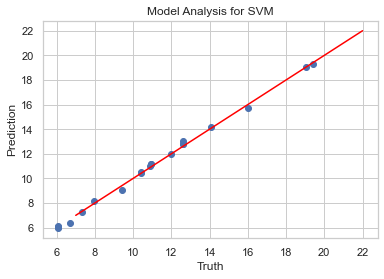

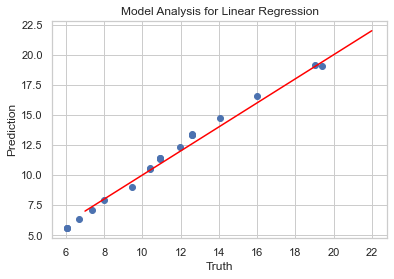

In [30]:
best_model = models[3]
truths = y_test[0:20]
preds = best_model.predict(X_test[0:20])
residual_error = truths - preds

plt.scatter(truths, preds)
plt.plot([7.0, 22], [7.0, 22], c = "red")
plt.title("Model Analysis for SVM")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.show()

best_model = models[1]
truths = y_test[0:20]
preds = best_model.predict(X_test[0:20])
residual_error = truths - preds

plt.scatter(truths, preds)
plt.plot([7.0, 22], [7.0, 22], c = "red")
plt.title("Model Analysis for Linear Regression")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.show()

Had I more time, would try to use a Boosting technique -Gradient Boosting and grid search. We made assumptions when replaced the null values of employment_title with unemployed, and when we filled the other null values with the mean. When selecting the linear regression model we assumed that data is linearly separatable and the features are not correlated.